<a href="https://colab.research.google.com/github/mahima-c/AutoEncoder/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

**Load data**

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [16]:
latent_dim=64
class Autoencoder(Model):
  def __init__(self,latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(112, activation='relu'),
      layers.Dense(224, activation='relu'),
      layers.Dense(448, activation='relu'),
      layers.Dense(224, activation='relu'),
      layers.Dense(112, activation='relu'),

      layers.Dense(latent_dim, activation='relu'),

    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(112, activation='relu'),
      layers.Dense(224, activation='relu'),
      layers.Dense(448, activation='relu'),
      layers.Dense(224, activation='relu'),
      layers.Dense(112, activation='relu'),  
                                      
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [17]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [18]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0465 - val_loss: 0.0239
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0225 - val_loss: 0.0206
Epoch 3/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0203 - val_loss: 0.0200
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0194 - val_loss: 0.0189
Epoch 5/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0187 - val_loss: 0.0184
Epoch 6/20
1875/1875 [==============================] - 23s 13ms/step - loss: 0.0180 - val_loss: 0.0174
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0173 - val_loss: 0.0169
Epoch 8/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0164 - val_loss: 0.0168
Epoch 9/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0160 - val_loss: 0.0159
Epoch 10/20
1875/1875 [==============================] - 22s 12m

In [19]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

**Image Reconstruction**

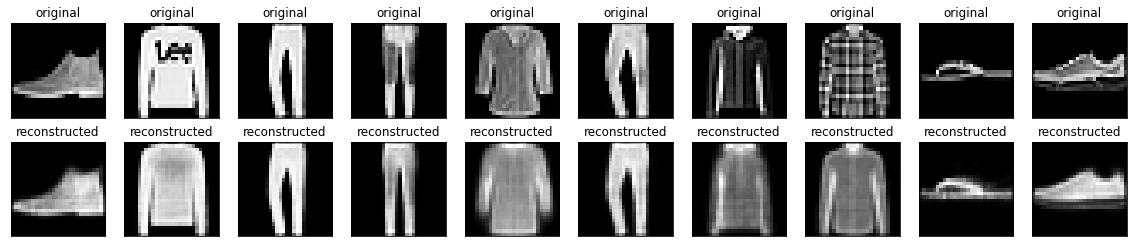

In [20]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)



  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

# **Encoded From**

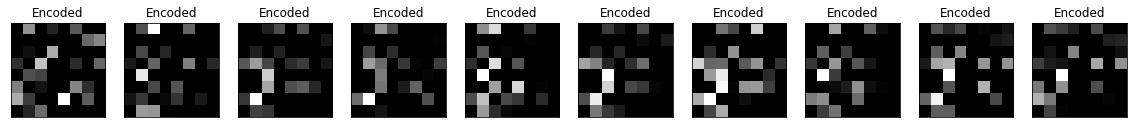

In [25]:
plt.figure(figsize=(20, 4))
for i in range(10):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(encoded_imgs[i].reshape(8,8))  
  plt.title("Encoded")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)  